In [ ]:
%load_ext autoreload
%autoreload 2

In [336]:
from nutritransform import load_model, generate_embedding_dict, load_food_data, extract_food_data, retrieve_nutrition
from nutritransform import filter_relevant_data, load_all_food_submissions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import defaultdict

# https://www.reddit.com/r/pushshift/comments/w23fg5/gaps_in_rs_submission_dumps_can_anyone_confirm/
# https://www.reddit.com/r/food/comments/exg935/a_massive_rule_overhaul/
# https://www.reddit.com/r/food/comments/rhok28/announcement_new_titles_rules_are_going_to_be/

In [337]:
df_food_subs = filter_relevant_data(load_all_food_submissions())

All posts ever 1303769
>2017 757009
Removed and deleted posts 756253
Remove duplicates 748194


/home/jovyan/work/sisic/nutritransform.py:49: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  'wweiaFoodCategoryDescription'] if food_db == 'SurveyFoods' else food_data['name']
/home/jovyan/work/sisic/nutritransform.py:51: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if 'amount' in nutrient_info:


Matched Regex 512943
Remaining after stripping empty 512261
Remaining after removing deleted users 400962


In [383]:
np.median(df_food_subs.author.value_counts().values)

1.0

In [348]:
food_data = load_food_data(filter_uncooked=False)

In [4]:
food_data_cooked = load_food_data()
load_model()

- "made with", "with", "and/or", "without", "from"

In [520]:
food_data_cooked.groupby(['title_simple_reversed']).mean()

,"Cryptoxanthin, beta",Lycopene,"Tocopherol, delta","Tocotrienol, gamma","Tocotrienol, delta","Vitamin C, total ascorbic acid",Thiamin,Riboflavin,"Folate, total",Vitamin K (Dihydrophylloquinone),...,MUFA 14:1,PUFA 21:5,"TFA 18:2 t,t",PUFA 20:3 n-6,"Fluoride, F",PUFA 18:2 i,SFA 13:0,Phytosterols,PUFA 2:4 n-6,MUFA 18:1-11 t (18:1t n-7)
title_simple_reversed,,,,,,,,,,,,,,,,,,,,,
3-2-1 plan ready-to-drink regular meal replacement slimfast unilever beverages,0.0,0.0,NaN,NaN,NaN,19.4,0.170,0.190,39.0,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freshly squeezed 100% orange juice,27.0,0.0,NaN,NaN,NaN,30.5,0.075,0.039,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lean and fat eaten t-bone steak beef,0.0,0.0,NaN,NaN,NaN,0.0,0.057,0.230,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lower sodium italian style chicken or turkey sausage,0.0,0.0,0.00,0.02,0.00,0.0,0.396,0.469,71.0,0.0,...,0.008,NaN,NaN,NaN,22.4,NaN,NaN,0.0,NaN,NaN
medium crust from restaurant or fast food pizza with pepperoni,0.0,1960.0,NaN,NaN,NaN,0.9,0.430,0.220,92.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zucchini bread,1.0,0.0,NaN,NaN,NaN,3.0,0.213,0.194,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zucchini cake or cupcake,3.0,0.0,NaN,NaN,NaN,1.6,0.063,0.237,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zucchini muffin,1.0,0.0,NaN,NaN,NaN,3.0,0.213,0.194,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [567]:
food_data_cooked.title_simple_reversed.values

array(['commercial hummus',
       'drained solids regular pack canned green snap beans',
       'with salt added dry roasted almonds nuts', ...,
       'roasted cooked water buffalo game meat',
       'roasted cooked elk game meat', 'roasted cooked goat game meat'],
      dtype=object)

In [254]:
embedded_db_dict = generate_embedding_dict(food_data_cooked.title_simple.values)
embedded_db_rev_dict = generate_embedding_dict(food_data_cooked.title_simple_reversed.values)
embedded_ff_dict = generate_embedding_dict(food_data[food_data.data_source == 'foundation'].title_simple.values)
embedded_ff_rev_dict = generate_embedding_dict(food_data[food_data.data_source == 'foundation'].title_simple_reversed.values)

In [368]:
embedded_db_all_dict = generate_embedding_dict(food_data.title_simple.values)
embedded_db_rev_all_dict = generate_embedding_dict(food_data.title_simple_reversed.values)

In [367]:
food_data.drop_duplicates(subset=['title_simple_reversed'], inplace=True)

In [233]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

In [250]:
foundation_data, foundation_units = extract_food_data(
        'food_data/FoodData_Central_foundation_food_json_2022-10-28.json', food_db='FoundationFoods')

In [232]:
model = SentenceTransformer('all-mpnet-base-v2')

In [242]:
cos_sim(model.encode('I ate roast beef'), model.encode('roast beef'))

tensor([[0.7244]])

In [244]:
cos_sim(model.encode('sour cherry jam.'), model.encode('roast beef.'))

tensor([[0.3865]])

In [589]:
food_data[food_data.parent_name == food_data.name].data_source.value_counts()

legacy        7618
foundation      97
survey22         2
Name: data_source, dtype: int64

In [ ]:
food_data[food_data.parent_name == food_data.name]

## eval

In [546]:
from sklearn.metrics import mean_squared_error, median_absolute_error
from nutritransform import plot_hist, create_comparison_df, retrieve_nutrition, merge_and_calc_errors, calc_errors, grid_search_n_thresh, nutrition_df_apply_thresholds, compute_metric_df, mean_se, median_ae
df_foodcom = pd.read_csv('food_data/west/foodcom_sample.csv', index_col=0)
foodcom_cj = pd.read_csv('food_data/west/foodcom_food_nutrition.csv')
df_foodcom_grouped = df_foodcom.groupby('clean_title').mean().reset_index()

In [558]:
df_foodcom[df_foodcom.kcal_100g < 750]

,kcal,carb,fat,prot,sodium,chol,title,serving_size,file,domain,url,ss_clean,clean_title,factor_100g,kcal_100g,carb_100g,fat_100g,prot_100g,sodium_100g,chol_100g
676,28.4,16.0,10.8,1.2,11.2,0.7,Rolo Pretzel Cookies Recipe - Food.com - 148951,1 (0 g),ab613f7cd32688cfe4228837b2008489.html,food.com,http://www.food.com/recipe/Rolo-Pretzel-Cookie...,0,rolo pretzel cookies,0.00,inf,inf,inf,inf,inf,inf
1802,270.2,30.8,243.9,1.2,43.5,0.0,Paula Deen's Lemon Salad Dressing Recipe - Foo...,1 (33 g),b14fbe0477091c690dff9591bb76acb8.html,food.com,http://www.food.com/recipe/paula-deens-lemon-s...,33,paula deen's lemon salad dressing,0.33,818.787879,93.333333,739.090909,3.636364,1.318182e+02,0.000000
3207,12141.4,311.6,11917.8,119.2,7195.4,558.0,Popeye's Fried Chicken Copycat Recipe - Deep-f...,1 (1250 g),12a129b8c6278205176bab9be301b9eb.html,food.com,http://www.food.com/recipe/popeyes-fried-chick...,1250,popeye's fried chicken copycat,12.50,971.312000,24.928000,953.424000,9.536000,5.756320e+02,44.640000
3734,380.2,10.8,365.4,2.0,7.1,0.0,Tilapia Marinade Recipe - Food.com - 309890,1 (48 g),b04d9833681dbca048c4acfa334e6249.html,food.com,http://www.food.com/recipe/tilapia-marinade-30...,48,tilapia marinade,0.48,792.083333,22.500000,761.250000,4.166667,1.479167e+01,0.000000
4287,275.8,301.6,51.3,21.6,47.8,0.0,Five-Spice Powder Recipe - Food.com - 66216,1 (28 g),52749e6c764573bf5e270942c483ee9b.html,food.com,http://www.food.com/recipe/five-spice-powder-6...,28,five-spice powder,0.28,985.000000,1077.142857,183.214286,77.142857,1.707143e+02,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65025,832.2,11.2,706.5,116.0,2408.9,101.3,Shishlik Israeli Skewers) Recipe - Food.com - ...,1 (87 g),8a7d6dbe443ebf6a5021ee02b1eae7dd.html,food.com,http://www.food.com/recipe/shishlik-israeli-sk...,87,shishlik israeli skewers,0.87,956.551724,12.873563,812.068966,133.333333,2.768851e+03,116.436782
66060,542.5,508.4,22.5,25.6,1.6,0.0,Reindeer Food Recipe - Food.com - 48773,1 (70 g),e338cc2a6f4ee04337c816ad9a7935be.html,food.com,http://www.food.com/recipe/Reindeer-Food-48773,70,reindeer food,0.70,775.000000,726.285714,32.142857,36.571429,2.285714e+00,0.000000
66118,264.2,234.4,35.1,34.4,18646.9,0.0,Greek Seasoning Mix Recipe - Food.com - 61579,1 (32 g),fb47229c9d5ed98fa0ae8ac26fc842c4.html,food.com,http://www.food.com/recipe/greek-seasoning-mix...,32,greek seasoning mix,0.32,825.625000,732.500000,109.687500,107.500000,5.827156e+04,0.000000
69839,1680.0,54.0,1657.8,16.0,1311.0,488.0,Lemon Garlic Butter Sauce For Crab Or Seafood)...,1 (150 g),eae904836231ee1ba57dfc46e717635e.html,food.com,http://www.food.com/recipe/lemon-garlic-butter...,150,lemon garlic butter sauce for crab or seafood,1.50,1120.000000,36.000000,1105.200000,10.666667,8.740000e+02,325.333333


In [554]:
df_foodcom_cal_comp = df_foodcom_grouped[['clean_title', 'kcal_100g']].merge(foodcom_cj.groupby('clean_title').mean().reset_index()[['clean_title', 'calories']], on='clean_title').dropna()
df_foodcom_cal_comp = df_foodcom_cal_comp[df_foodcom_cal_comp.kcal_100g < 900]
print('RMSE', mean_se(df_foodcom_cal_comp.kcal_100g, df_foodcom_cal_comp.calories))
print('MAE', median_ae(df_foodcom_cal_comp.kcal_100g, df_foodcom_cal_comp.calories))

RMSE 148.1069505426537
MAE 67.36358585704387


In [533]:
df_foodcom[['kcal_100g']]

10       208.916155
23        53.311966
27       141.292517
28       376.500000
29       141.397380
            ...    
70550    177.933333
70558    106.912046
70563    351.538462
70576    216.066351
70593    177.586207
Name: kcal_100g, Length: 10643, dtype: float64

In [340]:
df_in_gt = df_food_subs[df_food_subs.clean_title.isin(df_foodcom.clean_title)]

In [346]:
df_res_gt = retrieve_nutrition(df_in_gt.clean_title.values, food_data_cooked, 
                               embedded_db_rev_dict, title_col='title_simple_reversed', n=50)

In [347]:
df_gt_full = grid_search_n_thresh(df_res_gt, df_foodcom, foodcom_cj, [1,3,5,10,15,20,25,30,40,50], thresh_l=[0, 0.25, 0.5, 0.7, 0.8, 0.9], metric_l=[np.mean, np.median, np.min, np.max])


In [349]:
df_gt_full.nsmallest()

,sim_thresh,n,metric,mae_Energy,mse_Energy,"mae_Carbohydrate, by difference","mse_Carbohydrate, by difference",mae_Total lipid (fat),mse_Total lipid (fat),mae_Protein,mse_Protein,mae_Cholesterol,mse_Cholesterol
0,0.0,1,mean,66.362374,16739.943765,49.447921,8647.040232,67.501425,14248.127191,15.777419,861.626315,16.716981,5161.169966
1,0.0,1,median,66.362374,16739.943765,49.447921,8647.040232,67.501425,14248.127191,15.777419,861.626315,16.716981,5161.169966
2,0.0,1,amin,66.362374,16739.943765,49.447921,8647.040232,67.501425,14248.127191,15.777419,861.626315,16.716981,5161.169966
3,0.0,1,amax,66.362374,16739.943765,49.447921,8647.040232,67.501425,14248.127191,15.777419,861.626315,16.716981,5161.169966
4,0.0,3,mean,60.468299,13242.622004,48.248929,8539.958069,67.719250,14439.233848,15.572167,863.086481,18.013215,2975.208651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.9,40,amax,56.854099,15317.008740,58.278712,8025.549215,48.457337,10679.700151,13.538325,698.089929,13.099038,1583.090369
236,0.9,50,mean,55.674014,15261.800072,58.278712,8063.789362,48.457337,10688.418313,13.538325,698.747898,13.099038,1581.040173
237,0.9,50,median,55.674014,15264.385196,58.278712,8053.138535,48.457337,10686.554010,13.538325,698.579789,13.099038,1578.185860
238,0.9,50,amin,52.132559,15295.074463,58.278712,8115.002588,48.457337,10699.314236,13.538325,699.609309,12.695076,1596.700352


In [372]:
df_res_50_all = retrieve_nutrition(df_foodcom.clean_title.values, food_data, 
                                embedded_db_rev_all_dict, title_col='title_simple_reversed', n=50)
df_res_50_normal = retrieve_nutrition(df_foodcom.clean_title.values, food_data, 
                                embedded_db_all_dict, title_col='title_simple', n=50)

In [96]:
df_res_50 = retrieve_nutrition(df_foodcom.clean_title.values, food_data_cooked, 
                                embedded_db_rev_dict, title_col='title_simple_reversed', n=50)
df_res_50_normal = retrieve_nutrition(df_foodcom.clean_title.values, food_data_cooked, 
                                      embedded_db_dict, title_col='title_simple', n=50)
df_ff50 = retrieve_nutrition(df_foodcom.clean_title.values, food_data[food_data.data_source == 'foundation'], 
                                embedded_ff_rev_dict, title_col='title_simple_reversed', n=50)
df_res_ff50_normal = retrieve_nutrition(df_foodcom.clean_title.values, food_data[food_data.data_source == 'foundation'], 
                                      embedded_ff_dict, title_col='title_simple', n=50)

In [327]:
df_gs_full = grid_search_n_thresh(df_res_50, df_foodcom, foodcom_cj, [1,3,5,10,15,20,25,30,40,50], thresh_l=[0, 0.25, 0.5, 0.7, 0.8, 0.9], metric_l=[np.mean, np.median, np.min, np.max])
df_gs_full_normal = grid_search_n_thresh(df_res_ff50_normal, df_foodcom, foodcom_cj, [1,3,5,10,15,20,25,30,40,50], thresh_l=[0, 0.25, 0.5, 0.7, 0.8, 0.9], metric_l=[np.mean, np.median, np.min, np.max])
df_gs_ff = grid_search_n_thresh(df_ff50, df_foodcom, foodcom_cj, [1,3,5,10,15,20,25,30,40,50], thresh_l=[0, 0.25, 0.5, 0.7, 0.8, 0.9], metric_l=[np.mean, np.median, np.min, np.max])
df_gs_ff_normal = grid_search_n_thresh(df_res_ff50_normal, df_foodcom, foodcom_cj, [1,3,5,10,15,20,25,30,40,50], thresh_l=[0, 0.25, 0.5, 0.7, 0.8, 0.9], metric_l=[np.mean, np.median, np.min, np.max])

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/jovyan/work/sisic/nutritransform.py:100: RuntimeWarning: Mean of empty slice
  'mse': np.nanmean(df_err[f'diff_squ_{col}'])} if return_err else None


In [373]:
df_gs_full_food = grid_search_n_thresh(df_res_50_all, df_foodcom, foodcom_cj, [1,3,5,10,15,20,25,30,40,50], thresh_l=[0, 0.25, 0.5, 0.7, 0.8, 0.9], metric_l=[np.mean, np.median, np.min, np.max])
df_gs_full_food_normal = grid_search_n_thresh(df_res_50_normal, df_foodcom, foodcom_cj, [1,3,5,10,15,20,25,30,40,50], thresh_l=[0, 0.25, 0.5, 0.7, 0.8, 0.9], metric_l=[np.mean, np.median, np.min, np.max])


In [505]:
df_gs_full_food.nsmallest(5, 'mae_Energy')

,sim_thresh,n,metric,mae_Energy,mse_Energy,"mae_Carbohydrate, by difference","mse_Carbohydrate, by difference",mae_Total lipid (fat),mse_Total lipid (fat),mae_Protein,mse_Protein,mae_Cholesterol,mse_Cholesterol
169,0.8,5,median,56.560976,15979.979759,46.425806,7879.123009,57.963659,16871.240850,13.549409,766.501072,12.533998,2773.773053
168,0.8,5,mean,56.727273,15636.682486,46.425806,7846.910059,57.963659,16845.773031,13.447559,764.483398,12.695449,2754.903440
165,0.8,3,median,56.729977,16356.301355,46.397759,7873.984057,57.963659,16853.943568,13.575970,765.676064,12.863762,2766.250706
164,0.8,3,mean,56.731591,15826.222935,46.425806,7849.806080,58.072075,16845.283235,13.447559,764.064379,12.644652,2753.801070
173,0.8,10,median,56.731591,16057.522818,46.425806,7880.381501,57.963659,16885.027035,13.549409,766.510284,12.514585,2773.378854


In [371]:
df_gs_full_food.nsmallest(5, 'mae_Energy')

,sim_thresh,n,metric,mae_Energy,mse_Energy,"mae_Carbohydrate, by difference","mse_Carbohydrate, by difference",mae_Total lipid (fat),mse_Total lipid (fat),mae_Protein,mse_Protein,mae_Cholesterol,mse_Cholesterol
169,0.8,5,median,56.464646,16001.517570,46.462662,7897.456147,57.963659,16922.648805,13.637189,769.656364,12.551440,2782.786453
168,0.8,5,mean,56.696970,15691.826552,46.529884,7865.666538,58.017867,16889.305961,13.534238,767.407233,12.733945,2764.400210
173,0.8,10,median,56.729977,16078.076435,46.486447,7898.773762,57.963659,16936.115986,13.637189,769.705691,12.515152,2782.314191
177,0.8,15,median,56.729977,16080.894131,46.486447,7898.849291,57.963659,16936.178453,13.637189,769.754133,12.515152,2782.448367
181,0.8,20,median,56.729977,16081.261951,46.486447,7898.849931,57.963659,16936.188016,13.637189,769.766755,12.515152,2782.453246


In [332]:
df_gs_full.nsmallest(5, 'mae_Energy')

,sim_thresh,n,metric,mae_Energy,mse_Energy,"mae_Carbohydrate, by difference","mse_Carbohydrate, by difference",mae_Total lipid (fat),mse_Total lipid (fat),mae_Protein,mse_Protein,mae_Cholesterol,mse_Cholesterol
169,0.8,5,median,56.464646,16001.060773,46.462662,7897.456172,57.963659,16923.104154,13.637189,769.713309,12.551440,2782.827020
168,0.8,5,mean,56.696970,15691.750821,46.529884,7865.667715,58.017867,16889.658421,13.534238,767.483070,12.733945,2764.309241
165,0.8,3,median,56.729977,16394.231414,46.447459,7893.713846,57.963659,16904.928067,13.655233,768.879710,12.913043,2775.002246
173,0.8,10,median,56.729977,16078.160546,46.486447,7898.773762,57.963659,16936.121358,13.637189,769.705691,12.515152,2782.314191
177,0.8,15,median,56.729977,16080.982737,46.486447,7898.849291,57.963659,16936.189689,13.637189,769.764844,12.515152,2782.443472


In [331]:
df_gs_full.nsmallest(5, 'mse_Energy')

,sim_thresh,n,metric,mae_Energy,mse_Energy,"mae_Carbohydrate, by difference","mse_Carbohydrate, by difference",mae_Total lipid (fat),mse_Total lipid (fat),mae_Protein,mse_Protein,mae_Cholesterol,mse_Cholesterol
36,0.00,50,mean,63.071313,14585.665513,40.761057,8592.513017,62.683408,17541.418019,14.411267,859.515047,17.780000,1924.034643
76,0.25,50,mean,63.071313,14588.015344,40.761057,8591.918537,62.683408,17541.439508,14.411267,859.511828,17.780000,1924.155927
32,0.00,40,mean,62.522506,14589.784864,40.866469,8584.394387,62.676054,17533.993732,14.458878,859.667601,17.615385,1950.619135
72,0.25,40,mean,62.522506,14592.607733,40.866469,8583.985665,62.676054,17533.929392,14.458878,859.666972,17.615385,1950.850615
28,0.00,30,mean,62.194872,14665.619075,40.979013,8569.432216,62.731374,17523.632022,14.542298,860.678321,17.071930,1995.865210


In [308]:
df_nutres_thresh = nutrition_df_apply_thresholds(df_res_50, n=5, sim_thresh=0.0)
df_nutres_metrics = compute_metric_df(df_nutres_thresh,  np.mean)
df = create_comparison_df(df_foodcom, foodcom_cj, df_nutres_metrics)

In [523]:
df_nutres_metrics

,match_title,Energy,Water,"Carbohydrate, by difference",Protein,Total lipid (fat),"Fiber, total dietary","Sugars, total including NLEA",Cholesterol,"Alcohol, ethyl",Caffeine,"Vitamin C, total ascorbic acid",Vitamin D (D2 + D3)
0,ant kelly's london broil marinade,273.2,52.020,2.628,25.276,17.446,0.10,2.048,95.4,0.0,0.0,0.46,2.740
1,cream of cauliflower soup vegan,61.0,86.000,7.440,2.306,2.532,0.50,2.988,5.0,0.0,0.0,0.90,0.320
2,creamy vegan potato-leek soup,48.0,88.160,7.460,1.650,1.398,0.82,1.858,1.4,0.0,0.0,2.94,0.060
3,da best chicago-style italian beef,224.0,60.560,6.848,15.834,14.720,0.36,2.998,56.6,0.0,0.0,3.24,0.425
4,diet cake,337.0,22.032,65.000,4.364,6.940,6.96,31.060,38.2,0.0,0.8,0.10,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,zucchini stir fry,160.2,64.980,23.894,3.562,5.764,1.06,11.106,24.4,0.0,0.0,4.96,0.280
9810,zucchini with mint,217.6,53.780,31.728,3.474,8.984,2.30,22.660,26.6,0.0,0.0,10.40,0.260
9811,"zucchini, feta and dill pie",217.8,56.180,23.160,7.384,10.596,1.54,8.788,28.8,0.0,0.0,9.30,0.320
9812,zuchinni casserole,109.0,77.220,10.748,5.568,5.060,1.48,1.776,32.0,0.0,0.0,13.84,0.420


In [307]:
df_res_50.dropna(subset=['Energy']).match_title.unique().size

9814

In [352]:
foodcom_cj.columns

Index(['kcal', 'carb', 'fat', 'prot', 'sodium', 'chol', 'title',
       'serving_size', 'file', 'domain', 'url', 'ss_clean', 'clean_title',
       'food_title', 'calories', 'carbohydrates_total_g', 'cholesterol_mg',
       'fat_saturated_g', 'fat_total_g', 'fiber_g', 'potassium_mg',
       'protein_g', 'sodium_mg', 'sugar_g'],
      dtype='object')

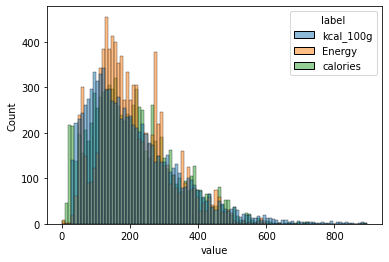

In [355]:
df_merged, df_err = merge_and_calc_errors(df_res_50, df_foodcom, foodcom_cj, 50, 0, np.median, thresh_minmax=(30, 600))
plot_hist(df_merged)

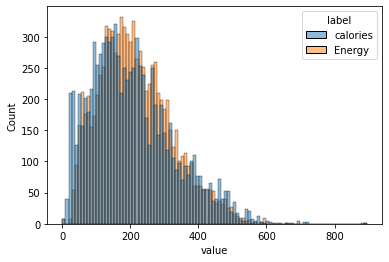

In [421]:
df_merged, df_err = merge_and_calc_errors(df_res_50, df_foodcom, foodcom_cj, 5, 0, np.mean, thresh_minmax=(30, 600))
plot_hist(df_merged, col_comp=['calories', 'Energy'])

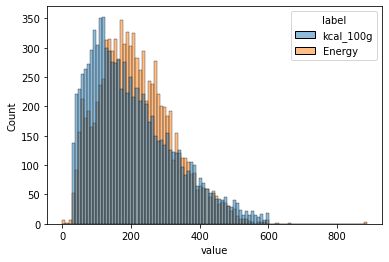

In [423]:
df_merged, df_err = merge_and_calc_errors(df_res_50, df_foodcom, foodcom_cj, 5, 0, np.mean, thresh_minmax=(30, 600))
plot_hist(df_merged, col_comp=['kcal_100g', 'Energy'])

In [455]:
df_merged[df_merged.clean_title == 'apple crisp'].kcal_100g

1185    223.790323
2380    147.455621
6658    166.160338
6688    147.455621
9353    301.167513
Name: kcal_100g, dtype: float64

95


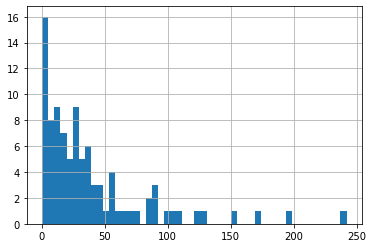

In [501]:
df_std = df_merged.groupby('clean_title').diff_abs_Energy.agg({'count', 'std'})
df_std = df_std[df_std > 0].dropna()
df_std[df_std['count'] < 5]['std'].hist(bins=50)
print(len(df_std))

In [434]:
df_merged[df_merged['clean_title'] == 'apple crisp'].Energy

1185    209.6
2380    209.6
6658    209.6
6688    209.6
9353    209.6
Name: Energy, dtype: float64

In [440]:
df_merged.groupby('clean_title').Energy.std().dropna().sort_values(ascending=False)

clean_title
 panera bread) black bean soup        0.0
olive garden copycat zuppa toscana    0.0
oatmeal cottage cheese pancakes       0.0
oatmeal shortbread                    0.0
old bay shrimp boil                   0.0
                                     ... 
easy baked ziti                       0.0
easy banana cream pie                 0.0
easy bavarian cream                   0.0
easy black bean soup                  0.0
zucchini relish                       0.0
Name: Energy, Length: 695, dtype: float64

In [425]:
df_merged.nsmallest(10, 'diff_abs_Energy')[['clean_title', 'kcal_100g', 'Energy']]

,clean_title,kcal_100g,Energy
2060,best collard greens ever!,56.614173,56.6
9088,warm or cold beet salad,39.245283,39.2
8865,canned tomato salsa,33.255814,33.2
5731,grated carrot and raw) beet salad,41.919192,42.0
4887,perfectly seasoned taco meat,199.076923,199.2
9426,ww low fat mushroom soup,53.525180,53.4
4611,fresh orange cupcakes with orange icing,346.966292,346.8
179,"pizza gain aka pizzagaina, pizza rustica, ital...",228.832117,229.0
88,german chocolate cake with coconut pecan frosting,366.008584,366.2
7645,german chocolate cake with coconut pecan frosting,366.008584,366.2


In [404]:
calc_errors(df_merged, 'Energy')

MedAE for kcal_100g and Energy 64.19999999999999
MSE for kcal_100g and Energy 15754.792193432884


In [401]:
calc_errors(df_debias, 'Energy')

MedAE for kcal_100g and Energy 64.07096774193542
MSE for kcal_100g and Energy 16276.619363974749


### Evaluate internally:
- Groupby title col
- Randomly split database
- crossvalsplit
- retrieve nutrition for val split
- eval with groundtruth
- report errors
- compare with calorieninjas(?)